# Model Evaluation Notes

In this Notebook I will share my compilation of information for the evaluation of Machine Learning models. In the first place we will begin by analyzing the classification problem. These notes have been mostly obtained from [1,2]. Then we will see some instruments to analyze the regression problem.


The references used for this development are stated bellow:

## References
1. MARIA KHALUSOVA: Machine Learning Model Evaluation Metrics | AnacondaCon 2019 - [available here](https://www.youtube.com/watch?v=wpQiEHYkBys&t=595s)
2. Maria Khalusova: Machine Learning Model Evaluation Metrics | PyData LA 2019 - [available here](https://www.youtube.com/watch?v=PeYQIyOyKB8&t=1168s)
3. 



## Libraries Needed

In [80]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets as skl_data
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

## Model Evaluation in Classification Problems

The data used comes from the python library `sklearn`. We can generate random n-class data for classification using `sklearn.datasets.make_classification` as follow: 

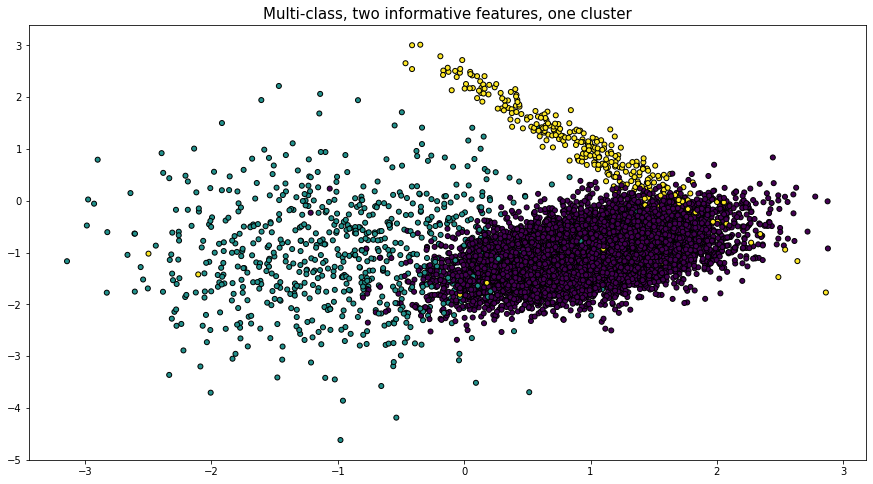

In [19]:
data_samples = 10000
num_classification_categories = 3

X1, Y1 = skl_data.make_classification(n_samples = data_samples, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=num_classification_categories, n_classes=3, 
                                      weights = [0.90, 0.07, 0.03])

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.30, random_state=42)

plt.figure(figsize=(15, 8))
plt.title("Multi-class, two informative features, one cluster", fontsize='15')
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.show()

Before starting analizing the data, lets build a model to predict these labels and check its performance metrics

In [73]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train,y_train)
dummy.score(X_test, y_test)

0.8933333333333333

In [67]:
def model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, activation='relu', input_shape=[2]),
        tf.keras.layers.Dense(num_classification_categories, activation=None)
        
    ])
    _opt = tf.keras.optimizers.Adam(learning_rate=0.001) 
    _loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=_opt,
                 loss=_loss,
                 metrics=['accuracy'])
    return model

modelo = model()

In [70]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')
history_2 = modelo.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks = [early_stop])

Epoch 1/50
219/219 [==============================] - 1s 2ms/step - loss: 0.9330 - accuracy: 0.5573 - val_loss: 0.4395 - val_accuracy: 0.8933
Epoch 2/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3904 - accuracy: 0.9003 - val_loss: 0.3268 - val_accuracy: 0.8933
Epoch 3/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3014 - accuracy: 0.8971 - val_loss: 0.2827 - val_accuracy: 0.8933
Epoch 4/50
219/219 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.8995 - val_loss: 0.2421 - val_accuracy: 0.9163
Epoch 5/50
219/219 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9296 - val_loss: 0.2089 - val_accuracy: 0.9320
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1810 - accuracy: 0.9464 - val_loss: 0.1914 - val_accuracy: 0.9350
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.9408 - val_loss: 0.1817 - val_accuracy: 0.9377
Epoch 

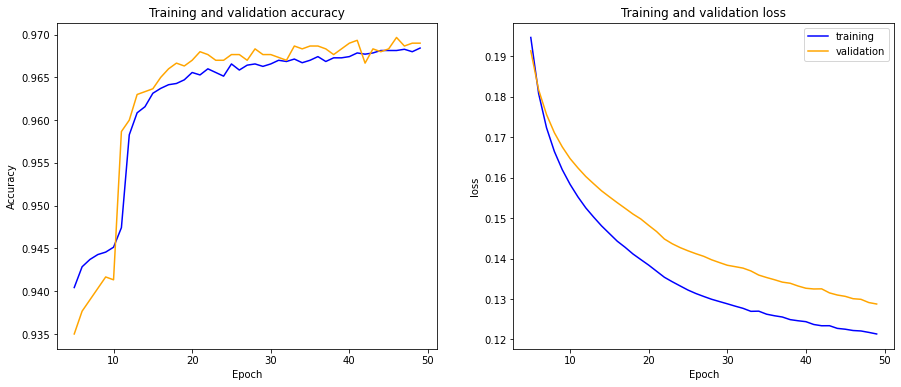

In [72]:
acc_2 = history_2.history['accuracy']
val_acc_2 = history_2.history['val_accuracy']
loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']
epochs_2 = range(len(acc_2))

plt.figure(figsize=(15,6))
# Plot accuracy vs epochs
plt.subplot(1,2,1)
plt.title('Training and validation accuracy')
plt.plot(epochs_2, acc_2, color='blue', label='training')
plt.plot(epochs_2[5:], val_acc_2, color='orange', label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot loss vs epochs
plt.subplot(1,2,2)
plt.title('Training and validation loss')
plt.plot(epochs_2, loss_2, color='blue', label='training')
plt.plot(epochs_2, val_loss_2, color='orange', label='validation')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

In [93]:
pred = modelo.predict(X_test)
predictions = np.zeros(np.shape(pred))
for i, r in enumerate(pred):
    predictions[i,np.argmax(r)]=1
print(predictions)

In [97]:
disp = sklearn.metrics.plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [100]:
sklearn.metrics.multilabel_confusion_matrix(y_tes,predictions)

array([[[ 247,   73],
        [  11, 2669]],

       [[2770,   11],
        [  54,  165]],

       [[2890,    9],
        [  28,   73]]])

SyntaxError: invalid syntax (<ipython-input-99-efa9570feb1f>, line 1)